# Google colab for Classifying ECG

Project Objectives and Suggestions:

- Main Objective: Identify and classify pathological heartbeats from ECG recordings.
- Dataset: Use the MIT-BIH arrhythmia database (https://physionet.org/content/mitdb/1.0.0/), available in csv format from Kaggle.
- Data Characteristics: 48 half-hour high-resolution recordings of 47 patients with various cardiologic conditions.

## Detailed Steps

Objective: Train individual models per patient from data recorded from that patient with a fixed recording instrument.

**Research and Literature** 📚
- Read Papers: Explore research based on the MIT-BIH arrhythmia dataset to find interesting objectives and alternative approaches.

**Techniques and Tools** 🛠
- Data Balancing: Address imbalance (more normal than abnormal data).
- Evaluation Metrics: Use accuracy, sensitivity, precision, and F1-score to evaluate model performance.
- Loss Function: Start with Adam optimizer. Research alternatives if needed (e.g., quadratic loss, L1-norm loss, logistic regression).
- Preprocessing: Apply a Butterworth filter to the data.
- Network Types: Feedforward vs. CNN: Experiment with both types to compare performance.

**Experimentation with CNNs**: 🧪
- 1-D CNN simple architecture as baseline
- using only one patients as data (train-val-test)
- Different Data Input: Use different data inputs for each CNN.
- Different Pre-processing Techniques: Apply various pre-processing techniques to the same data before feeding it into the network.

# Get started:

Table of contents:
- Get the data
- Inspect the data (become one with the data)
- Preprocess the data
- Create a model architecture (baseline)
- Fit the model
- Evaluate the model
  - confusion matrix, f1 score (recall-accuracy)
- Improve the baseline
  - hyperparameter tuning
  - undersrand the techniques
  - focus on CNN
  - all patients and then tweak for each patient individually (transfer learning for each)
- Repeat until satisfied

## 1) Get the data

In [1]:
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

Streaming output truncated to the last 5000 lines.
Length: 5468 (5.3K) [application/octet-stream]
Saving to: ‘physionet.org/files/mitdb/1.0.0/223.atr’

physionet.org/files 100%[===================>]   5.34K  --.-KB/s    in 0s      

2024-05-26 09:12:01 (1.59 GB/s) - ‘physionet.org/files/mitdb/1.0.0/223.atr’ saved [5468/5468]

--2024-05-26 09:12:01--  https://physionet.org/files/mitdb/1.0.0/223.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1950000 (1.9M) [application/octet-stream]
Saving to: ‘physionet.org/files/mitdb/1.0.0/223.dat’

physionet.org/files 100%[===================>]   1.86M   441KB/s    in 4.4s    

2024-05-26 09:12:05 (437 KB/s) - ‘physionet.org/files/mitdb/1.0.0/223.dat’ saved [1950000/1950000]

--2024-05-26 09:12:05--  https://physionet.org/files/mitdb/1.0.0/223.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 258 [text/plain]
Saving to: ‘physionet.

In [2]:
!ls /content/physionet.org/files/mitdb/1.0.0/

100.atr    105.atr  111.atr  116.dat  122.atr  202.dat	209.at_  214.xws  221.xws  231.xws
100.dat    105.dat  111.dat  116.hea  122.dat  202.hea	209.atr  215.at_  222.at_  232.atr
100.hea    105.hea  111.hea  116.xws  122.hea  202.xws	209.dat  215.atr  222.atr  232.dat
100.xws    105.xws  111.xws  117.at_  122.xws  203.at-	209.hea  215.dat  222.dat  232.hea
101.atr    106.atr  112.atr  117.atr  123.atr  203.at_	209.xws  215.hea  222.hea  232.xws
101.dat    106.dat  112.dat  117.dat  123.dat  203.atr	210.atr  215.xws  222.xws  233.atr
101.hea    106.hea  112.hea  117.hea  123.hea  203.dat	210.dat  217.atr  223.atr  233.dat
101.xws    106.xws  112.xws  117.xws  123.xws  203.hea	210.hea  217.dat  223.dat  233.hea
102-0.atr  107.atr  113.atr  118.atr  124.atr  203.xws	210.xws  217.hea  223.hea  233.xws
102.atr    107.dat  113.dat  118.dat  124.dat  205.atr	212.atr  217.xws  223.xws  234.atr
102.dat    107.hea  113.hea  118.hea  124.hea  205.dat	212.dat  219.atr  228.atr  234.dat
102.hea   

 Note🔑: **WFDB (WaveForm DataBase)** library is a set of tools and software library developed for working with physiological signals, primarily those used in electrophysiological research and medicine. It was developed at the PhysioNet resource, which is associated with the MIT Lab for Computational Physiology. The WFDB library is particularly useful for reading, writing, and processing waveform files in the formats supported by PhysioNet, including those in the MIT-BIH Arrhythmia Database.

* Reading and writing ECG signal files in various formats including the PhysioBank-standard formats (.dat, .hea, .atr, etc.).
* Analyzing and processing these signals.
* Accessing metadata about the recordings, such as the sampling frequency, the number of leads, annotations, and more.

In [3]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.1 MB/s eta 0:00:00


MIT-BIH Arrhythmia Database, "atr" stands for annotations. These annotations typically include labels for each heartbeat indicating its type (normal, premature ventricular contraction, etc.), as well as other event markers within the ECG data.

The .atr files specifically contain:

* The annotations related to each heartbeat.
* Timing information showing where each annotated event occurs within the ECG data.
* Symbols and auxiliary information that classify the heartbeats and other significant events recorded in the ECG signal.

These files are crucial for both clinical applications and research, as they provide expert interpretations of the ECG signals, which can be used for training algorithms, validating methodologies, or conducting clinical assessments.

**atr** = annotations

**dat** = actual data

**hea** = useful information (metadata about the waveform data) to correctly interpret .dat files


**Utilizing .dat and .hea Files**
* .dat Files: Contain the raw digital signal data (e.g., ECG waveform data).
* .hea Files: Contain metadata about the .dat files, such as the number of data channels, sampling frequency, and other details necessary to interpret the data correctly.

**Utilizing .atr Files**
* .atr Files: These are annotation files that include expert annotations of the waveform data, such as marking of individual heartbeats, arrhythmias, or other clinically relevant events.

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '

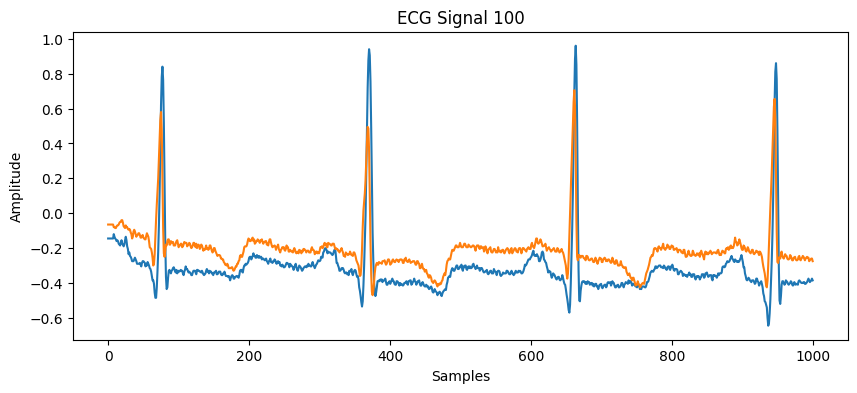

In [7]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Path to your data
data_path = '/content/physionet.org/files/mitdb/1.0.0/'

# Load a record (no need to specify '.dat' or '.hea')
# recognizes .dat and .hea file extensions (first reads hea then dat)
record100 = wfdb.rdrecord(data_path + '100')  # assuming '100' is one of the files
# Load annotations (specify the annotation type 'atr')
annotation100 = wfdb.rdann(data_path + '100', 'atr')

# Display the record
print(record100.p_signal)
print(annotation100.symbol)



# Plotting the signal
plt.figure(figsize=(10, 4))
plt.plot(record100.p_signal[0:1000])  # Plotting first 1000 samples
plt.title('ECG Signal 100')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

## 2) Inspect the data (visualize, visualize, visualize)

In [32]:
def plot_patient(p_number):
  data_path = '/content/physionet.org/files/mitdb/1.0.0/'
  record = wfdb.rdrecord(data_path + p_number)  # assuming '100' is one of the files
  # Load annotations (specify the annotation type 'atr')
  annotation = wfdb.rdann(data_path + p_number, 'atr')

  # Display the record
  print("Signal: ", record.p_signal)
  print("Annotation: ", annotation.symbol)

  # Plotting the signal
  plt.figure(figsize=(10, 4))
  plt.plot(record.p_signal[0:1000])  # Plotting first 1000 samples
  plt.title('ECG Signal' + p_number)
  plt.xlabel('Samples')
  plt.ylabel('Amplitude')
  plt.show()

In [33]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

def multi_plot_label(p_number):
    data_path = '/content/physionet.org/files/mitdb/1.0.0/'
    record = wfdb.rdrecord(data_path + str(p_number))
    annotation = wfdb.rdann(data_path + str(p_number), 'atr')

    # Assuming that there are two channels in the ECG data
    plt.figure(figsize=(15, 10))

    for i in range(1, 5):
        start_index = np.random.randint(0, record.p_signal.shape[0] - 1000)
        end_index = start_index + 1000
        plt.subplot(2, 2, i)

        # Plot both channels
        for channel in range(record.p_signal.shape[1]):
            plt.plot(record.p_signal[start_index:end_index, channel], label=f'Channel {channel + 1}')

        # Filter and plot annotations within the segment for both channels
        valid_indices = (annotation.sample >= start_index) & (annotation.sample < end_index)
        segment_ann_indices = annotation.sample[valid_indices] - start_index
        segment_ann_symbols = np.array(annotation.symbol)[valid_indices]

        for idx, symbol in zip(segment_ann_indices, segment_ann_symbols):
            # Plot annotations on top of both channels, adjust 'y' for visibility if necessary
            y_offset = record.p_signal[idx + start_index, 0]  # Adjust according to the signal amplitude
            plt.plot(idx, y_offset, 'ro')  # Mark annotation on the first channel
            plt.text(idx, y_offset, symbol, color='red', fontsize=12)

        plt.title(f'ECG Segment from {start_index} to {end_index}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()


**Purpose of .xws Files:**
* Waveform Visualization: .xws files usually contain settings or specifications that help software visualize the waveforms properly. These settings can include information on how to display the data, such as scaling, layout, or annotations to be highlighted.
* Compatibility: These files are generally used with software like LightWAVE, which is a web-based waveform and annotation viewer available on PhysioNet. LightWAVE uses these .xws files to configure the display of waveforms and annotations for users accessing the database online.

Cannot visualize xws in google colab as this one is used for interactive data. So if we want we can use LightWAVE: online, the .xws file will be used automatically by the platform to set up the waveform display according to the specifications stored in the file.

"If your focus is on data analysis, signal processing, or machine learning, you will primarily deal with .dat, .hea, and .atr files, as these contain the raw data and annotations necessary for such tasks."

**Additional File Types at the end of the folder**
* ANNOTATORS: This file likely lists the people or algorithms that have contributed annotations to the dataset. It might contain names or identifiers for annotation sources.
* RECORDS: This is typically a text file that lists all the records in the dataset. It's useful for scripting and automation because it allows programs to quickly know what data files are available.
* SHA256SUMS.txt: This file contains SHA-256 checksums for all files in the directory. It's used to verify the integrity of the files, ensuring that they haven't been corrupted or tampered with.
* index.html: A web page or a HTML file that might contain documentation or an index of the dataset. This could be useful for understanding the dataset's structure or for navigating the dataset if hosted online.
* robots.txt: This is a standard file used on web servers to guide web crawlers about which parts of a site should not be crawled or indexed.

Only relevant one might be the ANNOTATORS one

In [34]:
# Just change the name in '' with the filename you want to view from the ones showed in the text above
file_path = data_path + 'ANNOTATORS'
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

atr	reference beat, rhythm, and signal quality annotations



### Selecting the right patient

In [36]:
import pandas as pd
from collections import Counter
import ast


# Increase the number of rows and columns displayed in the console
pd.set_option('display.max_rows', None)  # None means show all rows
pd.set_option('display.max_columns', None)  # None means show all columns
pd.set_option('display.width', 1000)  # Set the display width for showing more characters
pd.set_option('display.max_colwidth', None)  # Show the full content of each column

# Load your DataFrame
ecg_df = pd.read_csv('ecg_data.csv')

# Assuming valid annotations are known
ecg_df['Annotations'] = ecg_df['Annotations'].apply(lambda x: ast.literal_eval(x))

# Define valid annotations
valid_annotations = {'N', 'A', 'V', 'f', 'x', 'L', 'R', 'F', '/', '~', 'Q', 'j', 'a', 'J', '!', 'E', 'S', '"', 'e'}

# Function to count valid annotations
def count_valid_annotations(annotations_list):
    # Filter annotations to include only valid ones and count them
    filtered_annotations = [annotation for annotation in annotations_list if annotation in valid_annotations]
    return Counter(filtered_annotations)

# Apply the function to each row in the DataFrame
ecg_df['Annotation_Counts'] = ecg_df['Annotations'].apply(count_valid_annotations)

# Now, the DataFrame 'ecg_df' has a new column 'Annotation_Counts' with counters of each annotation type per record
# Display the results
print(ecg_df[['Record Number', 'Annotation_Counts']])

    Record Number                                                                  Annotation_Counts
0             100                                                       {'N': 2239, 'A': 33, 'V': 1}
1             101                                                {'N': 1860, '~': 4, 'Q': 2, 'A': 3}
2             102                                              {'/': 2028, 'f': 56, 'N': 99, 'V': 4}
3             103                                                        {'N': 2082, '~': 6, 'A': 2}
4             104                          {'/': 1380, 'f': 666, '~': 37, 'Q': 18, 'N': 163, 'V': 2}
5             105                                              {'N': 2526, 'V': 41, '~': 88, 'Q': 5}
6             106                                                     {'~': 30, 'N': 1507, 'V': 520}
7             107                                                       {'/': 2078, 'V': 59, '~': 2}
8             108                     {'N': 1739, 'V': 17, 'x': 11, '~': 41, 'F': 2, 'A': 4

maybe patient 217 or 208
200
212
104

In [37]:
selected_records = [217, 208, 200, 212, 104]

# Filter the DataFrame to only include rows with these record numbers
selected_df = ecg_df[ecg_df['Record Number'].isin(selected_records)]

# Print the filtered DataFrame
print(selected_df[['Record Number', 'Annotation_Counts', 'Annotation Positions']])


    Record Number                                          Annotation_Counts                             Annotation Positions
4             104  {'/': 1380, 'f': 666, '~': 37, 'Q': 18, 'N': 163, 'V': 2}  [    36     73    316 ... 649300 649580 649876]
23            200            {'V': 826, 'N': 1743, 'A': 30, '~': 43, 'F': 2}  [    67    225    487 ... 649408 649664 649927]
29            208   {'F': 373, 'V': 992, 'N': 1586, '~': 24, 'S': 2, 'Q': 2}  [     9     46    209 ... 649411 649704 649935]
32            212                             {'R': 1825, 'N': 923, '~': 13}  [   125    214    451 ... 649414 649673 649945]
36            217          {'/': 1542, 'f': 260, 'V': 162, 'N': 244, '~': 4}  [   102    205    500 ... 649114 649429 649738]


In [38]:
print(ecg_df.head())

   Record Number                                                                                                             Signal                                                                                                                                                                                                                                                                                                        Annotations                             Annotation Positions                                          Annotation_Counts
0            100  [[-0.145 -0.065]\n [-0.145 -0.065]\n [-0.145 -0.065]\n ...\n [-0.675 -0.365]\n [-0.765 -0.335]\n [-1.28   0.   ]]  [+, N, N, N, N, N, N, N, A, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...]  [    18     7

In most records, the upper signal is a modified limb lead II (MLII), obtained by placing the electrodes on the chest. The lower signal is usually a modified lead V1 (occasionally V2 or V5, and in one instance V4); as for the upper signal, the electrodes are also placed on the chest.


Also only 212 has been recorded with recorder B.

Signal:  [[-0.5    0.05 ]
 [-0.5    0.05 ]
 [-0.5    0.05 ]
 ...
 [-0.34   0.235]
 [-0.33   0.22 ]
 [ 0.     0.   ]]
Annotation:  ['+', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'R', 'R', 'R', 'R', 'R', 'N', 'N', 'N', 'N', 'N',

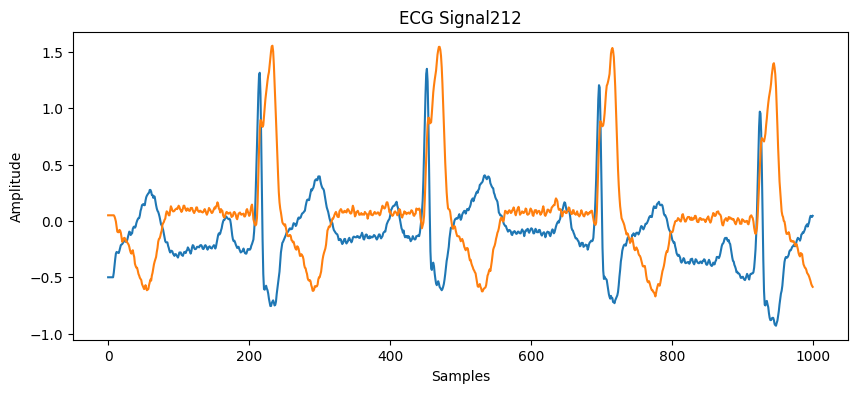

In [39]:
plot_patient('212')

Ok so now we got a pretty nice plot which shows random timesptamps from the patient's ECG reading also with the location and type of classification.

Interestingly enough it seems that the

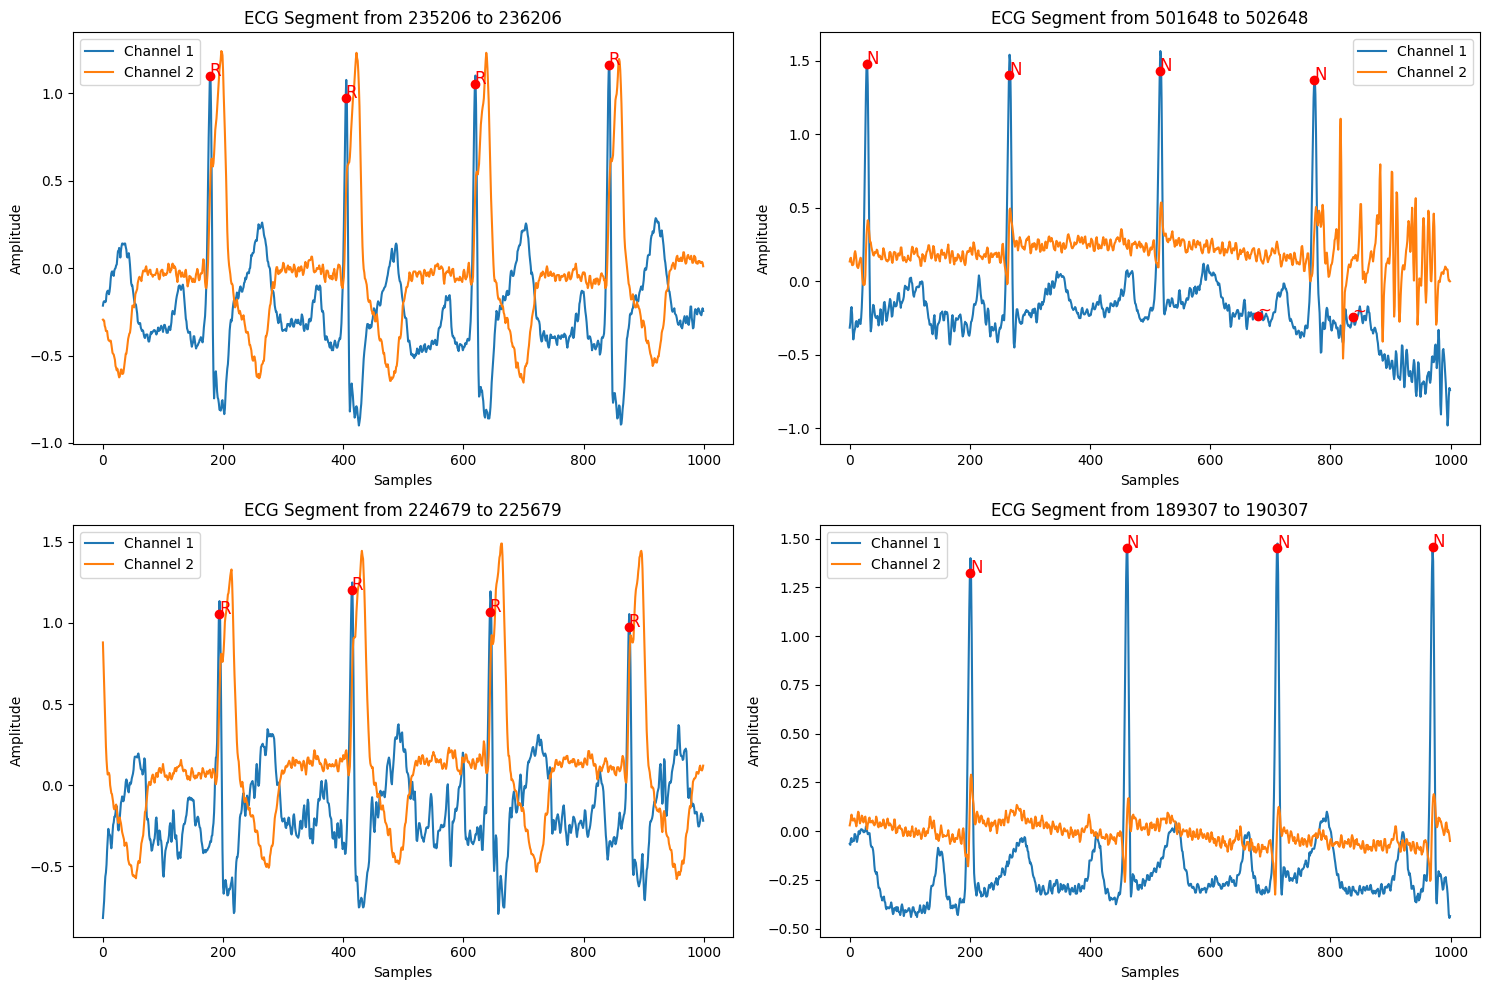

In [41]:
multi_plot_label('212')

In [56]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

def plot_annotation_signals(p_number):
    valid_annotations = {'N', 'A', 'V', 'f', 'x', 'L', 'R', 'F', '/', '~', 'Q', 'j', 'a', 'J', '!', 'E', 'S', '"', 'e'}
    data_path = '/content/physionet.org/files/mitdb/1.0.0/'
    record = wfdb.rdrecord(data_path + str(p_number))
    annotation = wfdb.rdann(data_path + str(p_number), 'atr')

    time_per_sample = 1 / record.fs if record.fs else 1 / 360  # Default sampling frequency

    plt.figure(figsize=(12, 6))
    ax = plt.gca()  # Get current axis

    # Map each annotation type to a unique color
    unique_symbols = sorted(set(annotation.symbol).intersection(valid_annotations))
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_symbols)))  # Viridis color map
    symbol_to_color = {symbol: color for symbol, color in zip(unique_symbols, colors)}

    # Plot annotations from both channels with the same color
    for idx, symbol in enumerate(annotation.symbol):
        if symbol in valid_annotations and idx < len(record.p_signal):
            time_point = annotation.sample[idx] * time_per_sample
            signal_values = record.p_signal[annotation.sample[idx]]

            for channel in range(record.p_signal.shape[1]):
                plt.scatter(time_point, signal_values[channel], color=symbol_to_color[symbol], label=symbol if symbol not in ax.get_legend_handles_labels()[1] else "", alpha=0.6)

    plt.title(f'Annotation Signal Values for Patient {p_number}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.legend(title='Annotations')
    plt.grid(True)
    plt.show()

The scatterplot represents the annotation signal values for Patient 212, plotted against time in seconds. Each dot on the plot corresponds to an annotation marker (such as 'R', 'N', or '~') at specific times during the ECG recording, and the vertical position of each dot indicates the amplitude of the ECG signal at that time.



**Observations:**

Distribution of Annotations: The plot shows a dense clustering of 'R' and 'N' annotations throughout the recorded period, suggesting a frequent and regular recording of normal and peak heart activities. The '~' annotations are less frequent, indicating fewer instances of noise or artifacts within the recording.

Variability in Amplitude: There is significant variability in the signal amplitudes at which these annotations occur, reflecting the natural physiological variations in heart activity and the potential influence of measurement conditions or artifacts.

**Clinical Relevance:**

Heart Activity Monitoring: The scatterplot is crucial for visualizing the pattern and frequency of heartbeats and identifying periods of irregularities or artifacts. By observing the distribution and amplitude of these annotations, clinicians can assess heart function or detect anomalies that may require further investigation.

Event Timing: Understanding when certain events occur (such as irregular heartbeats marked by '~' or other specific annotations not typically present in a normal ECG) can help in diagnosing heart conditions or in the calibration of medical devices.

This type of visualization aids in a quick assessment of the overall quality and characteristics of the ECG data, which is essential for both clinical diagnostics and research purposes.

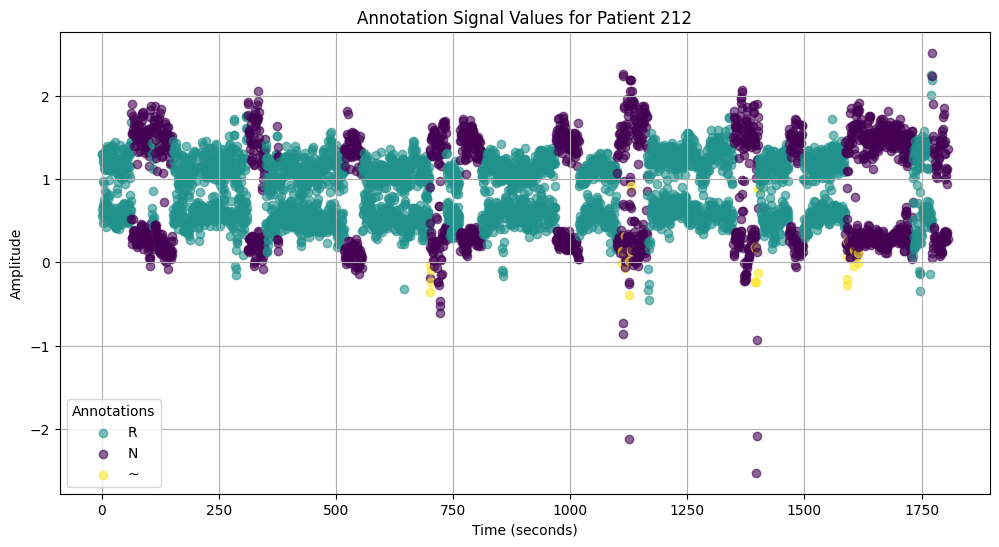

In [57]:
plot_annotation_signals('212')

In [59]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

def plot_annotation_sep_channels(p_number):
    valid_annotations = {'N', 'A', 'V', 'f', 'x', 'L', 'R', 'F', '/', '~', 'Q', 'j', 'a', 'J', '!', 'E', 'S', '"', 'e'}
    data_path = '/content/physionet.org/files/mitdb/1.0.0/'
    record = wfdb.rdrecord(data_path + str(p_number))
    annotation = wfdb.rdann(data_path + str(p_number), 'atr')

    time_per_sample = 1 / record.fs if record.fs else 1 / 360  # Default sampling frequency

    # Setting up the plot with two subplots, one for each channel
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)
    axes = axes.flatten()  # Flatten in case we use more subplots later

    # Map each annotation type to a unique color
    unique_symbols = sorted(set(annotation.symbol).intersection(valid_annotations))
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_symbols)))  # Viridis color map
    symbol_to_color = {symbol: color for symbol, color in zip(unique_symbols, colors)}

    # Iterate over each channel
    for channel in range(record.p_signal.shape[1]):
        ax = axes[channel]  # Select the subplot for the current channel
        for idx, symbol in enumerate(annotation.symbol):
            if symbol in valid_annotations and idx < len(record.p_signal):
                time_point = annotation.sample[idx] * time_per_sample
                signal_value = record.p_signal[annotation.sample[idx]][channel]
                ax.scatter(time_point, signal_value, color=symbol_to_color[symbol], label=symbol if symbol not in ax.get_legend_handles_labels()[1] else "", alpha=0.6)

        ax.set_title(f'Channel {channel + 1} Annotation Signals for Patient {p_number}')
        ax.set_xlabel('Time (seconds)')
        ax.set_ylabel('Amplitude')
        ax.grid(True)
        ax.legend(title='Annotations')

    plt.tight_layout()
    plt.show()

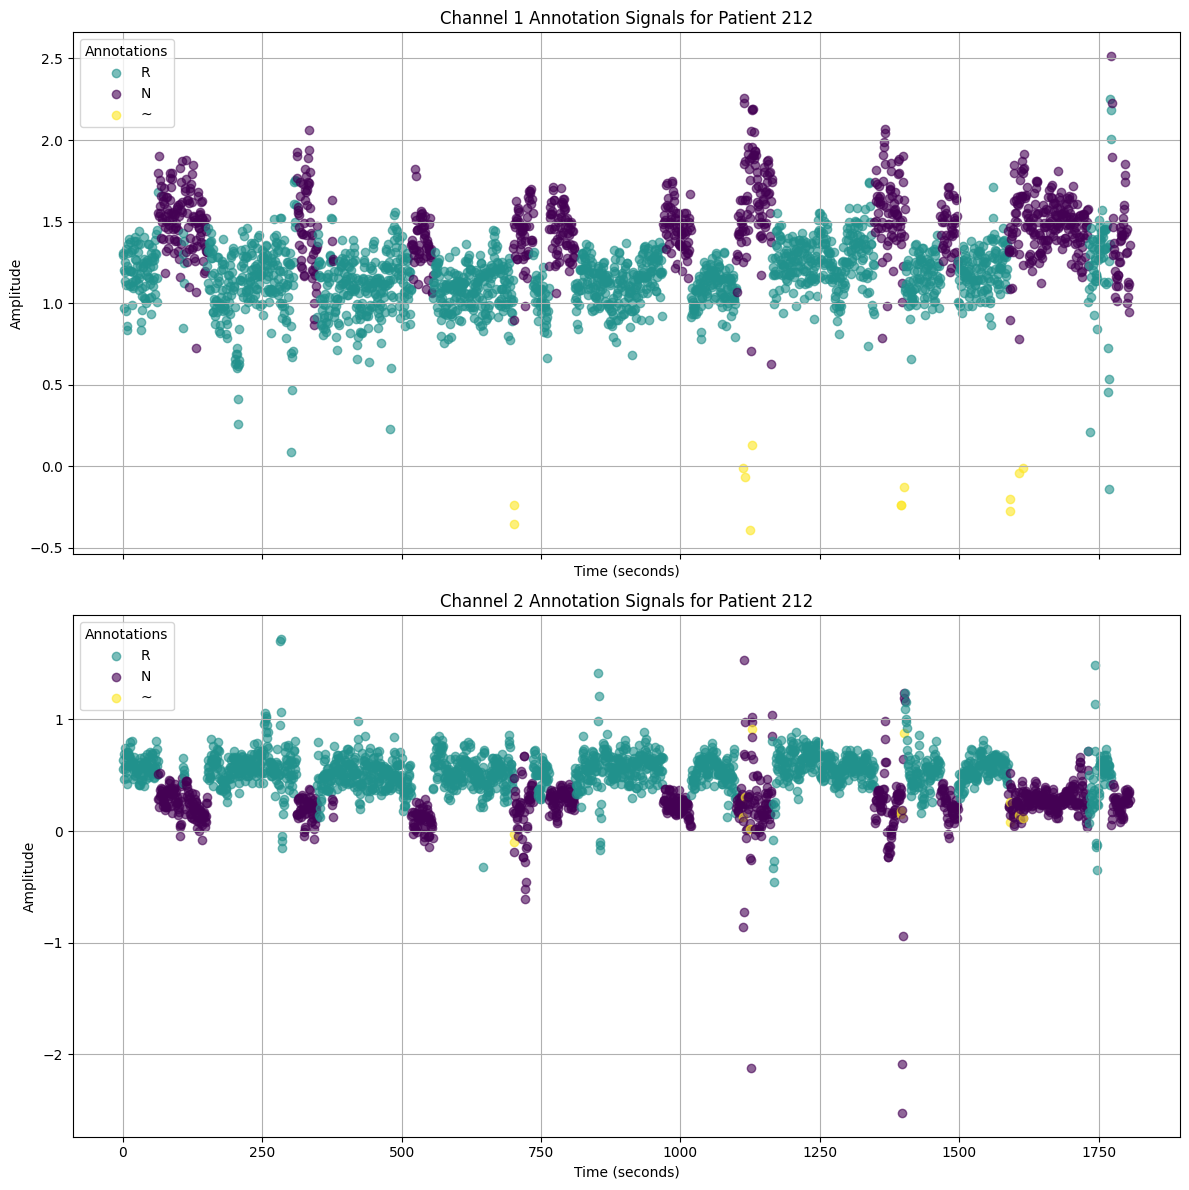

In [60]:
plot_annotation_sep_channels('212')

###Save and store the one relevant patient (not preprocessed yet)

In [61]:
import pandas as pd
import wfdb

def save_patient_data_to_csv(p_number):
    data_path = '/content/physionet.org/files/mitdb/1.0.0/'


    file_name = "patient_" + p_number + "_data.csv"
    # Load the ECG record
    record = wfdb.rdrecord(data_path + str(p_number))

    # Load the annotations
    annotation = wfdb.rdann(data_path + str(p_number), 'atr')

    # Create a DataFrame for the signal data
    signal_df = pd.DataFrame(record.p_signal, columns=[f'Channel_{i}' for i in range(record.p_signal.shape[1])])

    # Add time column (in seconds)
    signal_df['Time'] = (signal_df.index / record.fs)

    # Create a DataFrame for the annotations
    annotations_df = pd.DataFrame({
        'Time': annotation.sample / record.fs,
        'Symbol': annotation.symbol
    })

    # Merge the signal data with annotations
    # This merges based on the closest times, not exact matches
    full_df = pd.merge_asof(signal_df.sort_values('Time'), annotations_df.sort_values('Time'), on='Time', direction='nearest')

    # Save to CSV
    full_df.to_csv(file_name, index=False)
    print(f"Data for patient {p_number} has been saved to {file_name}")


In [62]:
save_patient_data_to_csv('212')

Data for patient 212 has been saved to patient_212_data.csv


In [63]:
p_212_df = pd.read_csv('patient_212_data.csv')

In [65]:
print(p_212_df.head())

   Channel_0  Channel_1      Time Symbol
0       -0.5       0.05  0.000000      +
1       -0.5       0.05  0.002778      +
2       -0.5       0.05  0.005556      +
3       -0.5       0.05  0.008333      +
4       -0.5       0.05  0.011111      +


## 3) Data Preprocessing

### Removing classes with too little data

We will remove class '~' from patient 212 because 13 annotations is way too little even if we are to perform oversampling and we are not confident that it work well (especially as this is regarding human health and we don't want to risk it)